In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim
import numpy as np
from utils import Rescale, train_model, visualize_train_cycle, visualize_model, CNNModelCustomSet, CNNModelFontsSet
from matplotlib import pyplot as plt

In [2]:
dataset_custom = datasets.ImageFolder(root='./markup/augmentation/', transform=transforms.Compose([Rescale((18, 28)), transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))
dataset_images = datasets.ImageFolder(root='./fonts_dataset/Images/Images/', transform=transforms.Compose([transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))

In [3]:
train_cnt_custom = int(len(dataset_custom) * 0.9)
val_cnt_custom = len(dataset_custom) - train_cnt_custom

train_cnt_images = int(len(dataset_images) * 0.9)
val_cnt_images = len(dataset_images) - train_cnt_images

print('Train samples count for Custom dataset = ', train_cnt_custom)
print('Validation samples count for Custom dataset = ', val_cnt_custom)

print('Train samples count for Images dataset = ', train_cnt_images)
print('Validation samples count for Images dataset = ', val_cnt_images)


train_set_custom, val_set_custom = torch.utils.data.random_split(dataset_custom, [train_cnt_custom, val_cnt_custom])
train_set_images, val_set_images = torch.utils.data.random_split(dataset_images, [train_cnt_images, val_cnt_images])

train_loader_custom = DataLoader(train_set_custom, batch_size=50, shuffle=True, num_workers=8)
val_loader_custom = DataLoader(val_set_custom, batch_size=50, shuffle=True, num_workers=8)

train_loader_images = DataLoader(train_set_images, batch_size=100, shuffle=True, num_workers=8)
val_loader_images = DataLoader(val_set_images, batch_size=100, shuffle=True, num_workers=8)

Train samples count for Custom dataset =  336
Validation samples count for Custom dataset =  38
Train samples count for Images dataset =  350788
Validation samples count for Images dataset =  38977


In [4]:
dataloaders_custom = {'train': train_loader_custom, 'val': val_loader_custom}
dataset_sizes_custom = {'train': train_cnt_custom, 'val': val_cnt_custom}

dataloaders_images = {'train': train_loader_images, 'val': val_loader_images}
dataset_sizes_images = {'train': train_cnt_images, 'val': val_cnt_images}

In [5]:
model = resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
model = CNNModelCustomSet()
print(model)

CNNModelCustomSet(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.3, inplace=False)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (dropout2): Dropout2d(p=0.45, inplace=False)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=26, bias=True)
)


In [8]:
### ResNet-18 train loop cycle ###
model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3,bias=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 26)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

model_ft = train_model(model = model, name = "ResNet-18Custom",device = device, dataset_sizes = dataset_sizes_custom, dataloader=dataloaders_custom,criterion = criterion, optimizer = optimizer_ft, num_epochs=10)
visualize_train_cycle(name = "ResNet-18Custom")
visualize_model(model = model_ft, title = "ResNet-18Custom", scale = (18, 28), device = device)

Epoch 0/9
----------
train Loss: 1.8668 Acc: 0.5446
val Loss: 1.9492 Acc: 0.5000

Epoch 1/9
----------


KeyboardInterrupt: 

In [9]:
# Высвобождение памяти
del model

In [10]:
### ResNet-18 train loop cycle ###
model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3,bias=False)
model.fc = nn.Linear(model.fc.in_features, 26)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

model_ft = train_model(model = model, name = "ResNet-18Images", device = device,dataset_sizes = dataset_sizes_images, dataloader=dataloaders_images,criterion = criterion, optimizer = optimizer_ft, num_epochs=5)
visualize_train_cycle(name = "ResNet-18Images")
visualize_model(model = model_ft, title = "ResNet-18Images", device = device)

Epoch 0/4
----------
train Loss: 0.5401 Acc: 0.8535
val Loss: 0.4224 Acc: 0.8841

Epoch 1/4
----------
train Loss: 0.3875 Acc: 0.8935
val Loss: 0.3671 Acc: 0.8978

Epoch 2/4
----------
train Loss: 0.3270 Acc: 0.9088
val Loss: 0.3502 Acc: 0.9035

Epoch 3/4
----------
train Loss: 0.2807 Acc: 0.9202
val Loss: 0.3157 Acc: 0.9126

Epoch 4/4
----------
train Loss: 0.2452 Acc: 0.9292
val Loss: 0.3190 Acc: 0.9141

Training complete in 126m 41s
Best val Acc: 0.914052


TypeError: visualize_model() missing 1 required positional argument: 'scale'

In [11]:
visualize_model(model = model_ft, title = "ResNet-18Images", scale = (32, 32), device = device)
# Высвобождение памяти
del model

Epoch 0/199
----------
train Loss: 3.2666 Acc: 0.0446
val Loss: 3.2637 Acc: 0.0263

Epoch 1/199
----------
train Loss: 3.2668 Acc: 0.0327
val Loss: 3.2614 Acc: 0.0263

Epoch 2/199
----------
train Loss: 3.2662 Acc: 0.0298
val Loss: 3.2579 Acc: 0.0263

Epoch 3/199
----------
train Loss: 3.2656 Acc: 0.0357
val Loss: 3.2533 Acc: 0.0263

Epoch 4/199
----------
train Loss: 3.2700 Acc: 0.0685
val Loss: 3.2482 Acc: 0.0526

Epoch 5/199
----------
train Loss: 3.2594 Acc: 0.0536
val Loss: 3.2428 Acc: 0.0263

Epoch 6/199
----------
train Loss: 3.2482 Acc: 0.0655
val Loss: 3.2369 Acc: 0.0263

Epoch 7/199
----------
train Loss: 3.2460 Acc: 0.0387
val Loss: 3.2310 Acc: 0.0263

Epoch 8/199
----------
train Loss: 3.2344 Acc: 0.0476
val Loss: 3.2248 Acc: 0.0263

Epoch 9/199
----------
train Loss: 3.2170 Acc: 0.0565
val Loss: 3.2185 Acc: 0.0263

Epoch 10/199
----------
train Loss: 3.2114 Acc: 0.0625
val Loss: 3.2120 Acc: 0.0263

Epoch 11/199
----------
train Loss: 3.2185 Acc: 0.0744
val Loss: 3.2055 Acc

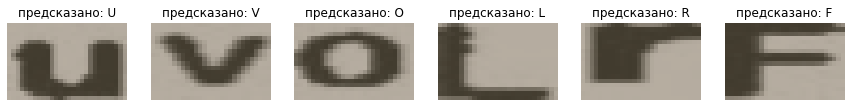

In [12]:
model = CNNModelCustomSet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.0001, momentum=0.99, nesterov=True)
model_ft = train_model(model = model, name = "CNNCustom", device = device, dataset_sizes = dataset_sizes_custom, dataloader=dataloaders_custom, criterion = criterion, optimizer = optimizer_ft, num_epochs=200)
visualize_train_cycle(name = "CNNCustom")
visualize_model(model = model_ft, title = "CNNCustom", scale = (18, 28), device = device)


In [13]:
# Высвобождение памяти
del model

Epoch 0/19
----------
train Loss: 1.6745 Acc: 0.5778
val Loss: 0.9965 Acc: 0.7526

Epoch 1/19
----------
train Loss: 1.0767 Acc: 0.7374
val Loss: 0.8668 Acc: 0.7838

Epoch 2/19
----------
train Loss: 0.9932 Acc: 0.7580
val Loss: 0.8226 Acc: 0.7962

Epoch 3/19
----------
train Loss: 0.9554 Acc: 0.7670
val Loss: 0.7979 Acc: 0.8009

Epoch 4/19
----------
train Loss: 0.9320 Acc: 0.7731
val Loss: 0.7749 Acc: 0.8067

Epoch 5/19
----------
train Loss: 0.9134 Acc: 0.7761
val Loss: 0.7604 Acc: 0.8106

Epoch 6/19
----------
train Loss: 0.9003 Acc: 0.7801
val Loss: 0.7504 Acc: 0.8120

Epoch 7/19
----------
train Loss: 0.8915 Acc: 0.7819
val Loss: 0.7454 Acc: 0.8144

Epoch 8/19
----------
train Loss: 0.8839 Acc: 0.7828
val Loss: 0.7350 Acc: 0.8174

Epoch 9/19
----------
train Loss: 0.8779 Acc: 0.7849
val Loss: 0.7286 Acc: 0.8174

Epoch 10/19
----------
train Loss: 0.8706 Acc: 0.7866
val Loss: 0.7234 Acc: 0.8200

Epoch 11/19
----------
train Loss: 0.8643 Acc: 0.7874
val Loss: 0.7207 Acc: 0.8195

Ep

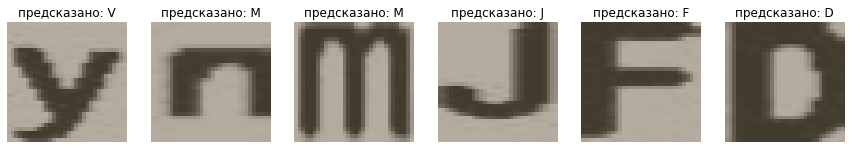

In [14]:
model = CNNModelFontsSet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.0001, momentum=0.99, nesterov=True)
model_ft = train_model(model = model, name = "CNNImages", device = device, dataset_sizes = dataset_sizes_images, dataloader=dataloaders_images, criterion = criterion, optimizer = optimizer_ft, num_epochs=20)
visualize_train_cycle(name = "CNNImages")
visualize_model(model = model_ft, title = "CNNImages", scale = (32, 32), device = device)